<a href="https://colab.research.google.com/github/shicoded/polynomial-regression/blob/main/house_perdiction__number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import all necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from joblib import dump, load

**Check out the Data**

In [2]:
df= pd.read_csv('/content/drive/MyDrive/dataset_folder/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
print("The Dataset has",df.shape[0],"Rows")

print("The Dataset has",df.shape[1],"Columns")
df.info()


The Dataset has 414 Rows
The Dataset has 8 Columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


**Define X and y**

In [5]:
X=df.drop('Y house price of unit area', axis=1)

y=df['Y house price of unit area']

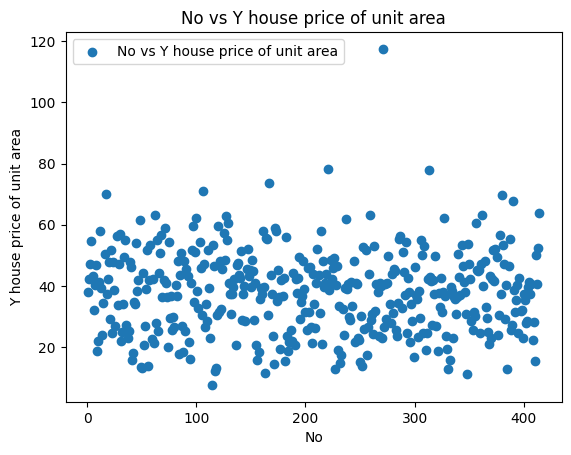

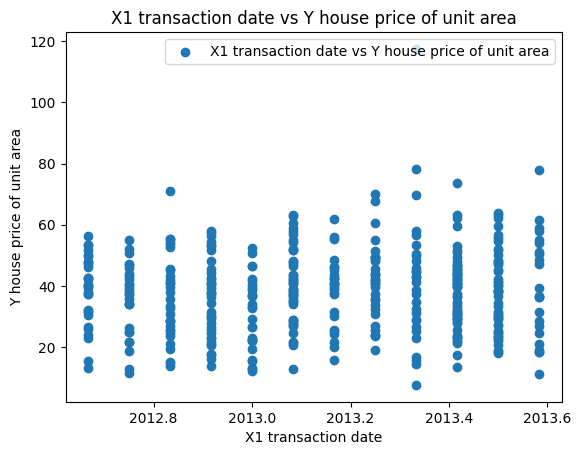

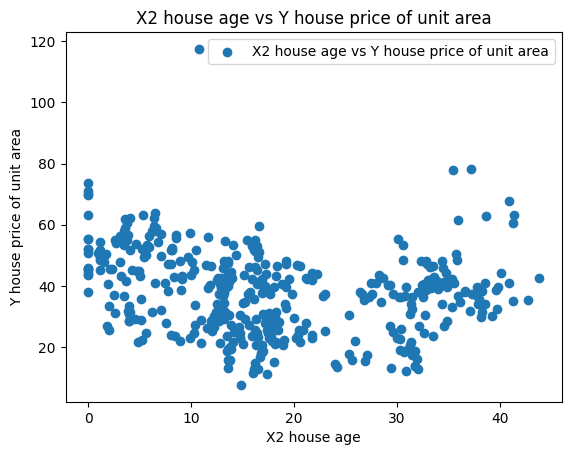

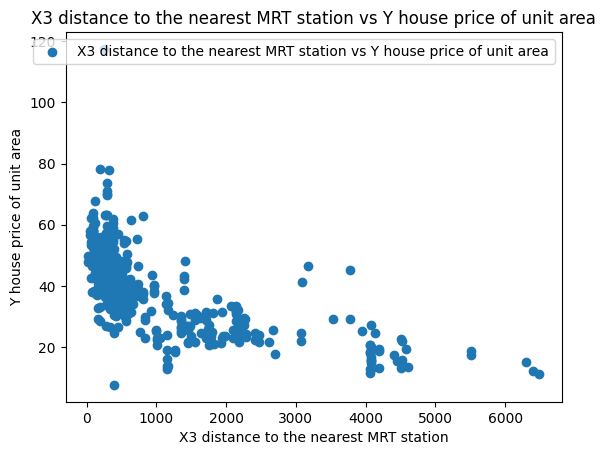

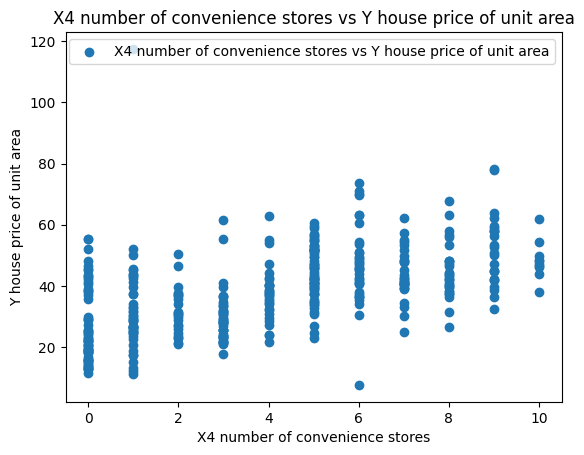

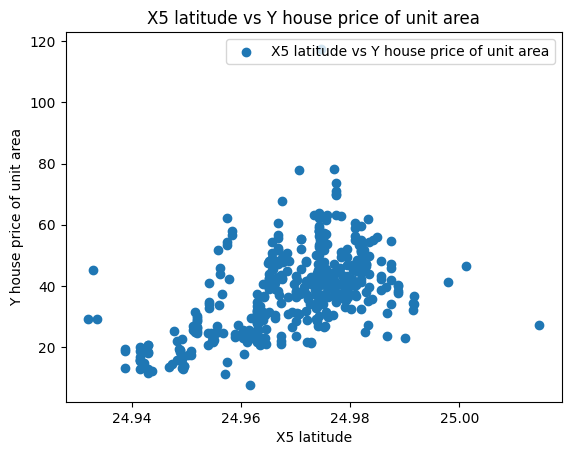

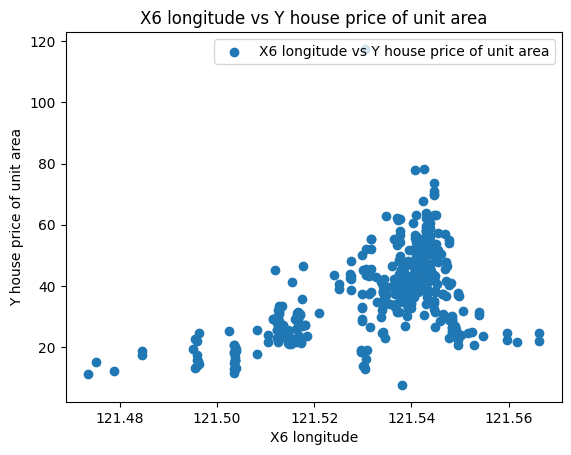

In [10]:
# Assuming X is a DataFrame with multiple columns (features)
for column in X.columns:
    plt.figure()  # Create a new figure for each feature
    plt.scatter(X[column], y, label=f'{column} vs Y house price of unit area')
    plt.xlabel(column)
    plt.ylabel('Y house price of unit area')
    plt.title(f'{column} vs Y house price of unit area')
    plt.legend()
    plt.show()

**Preprocessing**

In [19]:
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)
poly_features=polynomial_converter.fit(X)
poly_features=polynomial_converter.transform(X)
poly_features.shape


(414, 35)

In [20]:
X.shape

(414, 7)

**Train Test Split**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    poly_features, y, test_size=0.3, random_state=101)

**Training a Polynomial Regression Model**

In [22]:
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

**Predicting Test Data**


In [23]:
y_pred=polymodel.predict(X_test)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
176,19.2,16.382285,2.817715
347,11.2,3.929466,7.270534
307,24.7,17.438169,7.261831
299,46.1,47.146077,-1.046077
391,31.3,27.340932,3.959068


**Evaluating the Model**

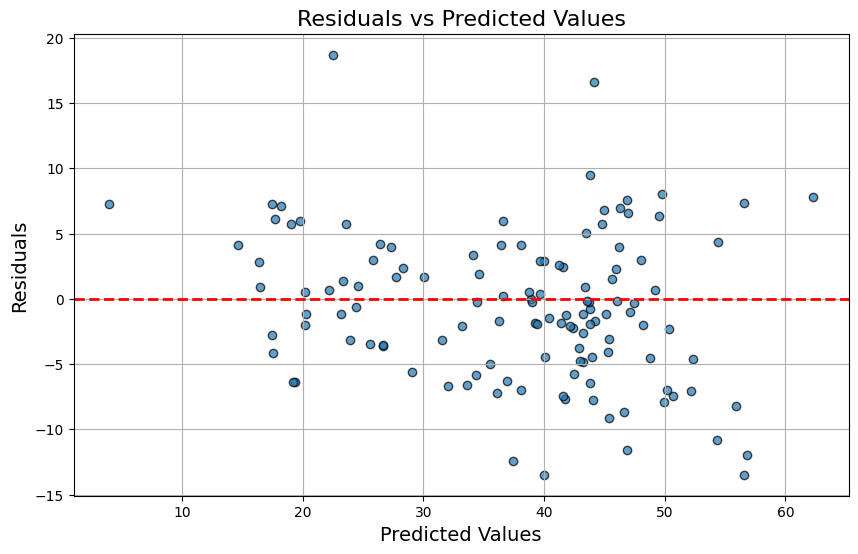

In [24]:
# Calculate residuals
residuals = y_test - y_pred

# Residual Analysis Plots

# 1. Residuals vs Predicted Values Plot
plt.figure(figsize=(10, 6))

# Scatter plot of predicted values vs. residuals
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)

# Horizontal line at residual = 0 for reference
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Predicted Values', fontsize=16)

# Improve the plot appearance
plt.grid(True)
plt.show()


In [25]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,4.490908
MSE,32.402929
RMSE,5.692357


**Compare to the simple linear regression**

In [26]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly], 'Simple Metrics':[MAE_simple, MSE_simple,
                                                                                 RMSE_simple]}, index=['MAE', 'MSE', 'RMSE'])

,Poly Metrics,Simple Metrics
MAE,4.490908,5.373025
MSE,32.402929,45.880307
RMSE,5.692357,6.773500


**Adjusting Model Parameters**

In [27]:
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):

    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)

    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)

    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)

    #Evaluating the Model

    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

    #Append the RMSE to the Train and Test List

    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)
pd.DataFrame({'Train RMSE List':train_RMSE_list})

,Train RMSE List
0,9.537107
1,8.037433
2,7.100081
3,7.612005
4,1.810087
5,0.516231
6,0.726042
7,0.375907
8,0.435393


In [28]:
pd.DataFrame({'Ttest RMSE List':test_RMSE_list})


,Ttest RMSE List
0,6.773500e+00
1,5.692357e+00
2,2.378883e+01
3,2.728918e+02
4,6.300103e+03
5,3.372490e+04
6,1.979477e+05
7,1.506492e+06
8,1.501134e+07


**Plot the Polynomial degree VS RMSE**

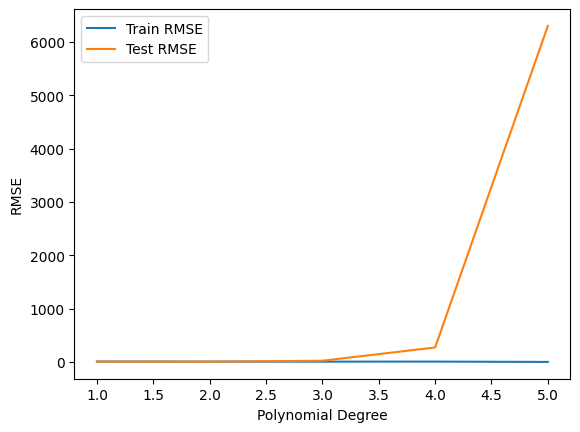

In [29]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()